## Nhóm PTDLUD#3
19120148 - Lê Huỳnh Minh Tuấn

19120341 - Phạm Nhựt Quang

19120687 - Ngô Quốc Toại

19120692 - Phạm Minh Trí


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

# EDA

In [2]:
# Đọc dữ liệu nguồn 1
df_1 = pd.read_csv("https://raw.githubusercontent.com/adishourya/Airbnb/master/new-york-city-airbnb-open-data/AB_NYC_2019.csv")
df_1.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
# Đọc dữ liệu nguồn 2
df_2 = pd.read_csv("airbnb-listings_new-york.csv", sep=';', low_memory=False)
df_2.head()

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,13494898,https://www.airbnb.com/rooms/13494898,20170502132028,2017-05-04,Modern 1BR apartment amazing location in Chelsea,This modern apartment is full of New York char...,NaN,This modern apartment is full of New York char...,none,NaN,...,10.0,10.0,10.0,NaN,NaN,flexible,1,0.29,"40.74032236139562,-74.00264894520818","Host Has Profile Pic,Is Location Exact"
1,7859723,https://www.airbnb.com/rooms/7859723,20170502132028,2017-05-04,Spacious Studio in Chelsea,Large and very clean studio on a beautiful tre...,NaN,Large and very clean studio on a beautiful tre...,none,NaN,...,10.0,10.0,10.0,NaN,NaN,strict,1,0.60,"40.74452858803597,-73.9998811278712","Host Has Profile Pic,Host Identity Verified,Is..."
2,137558,https://www.airbnb.com/rooms/137558,20170502132028,2017-05-05,MINIMALIST APT. HIGH-LINE AREA,NaN,This is the most charming place in the area. T...,This is the most charming place in the area. T...,none,NaN,...,10.0,10.0,9.0,NaN,NaN,strict,1,0.20,"40.752836564513,-74.0071511604528","Host Has Profile Pic,Is Location Exact"
3,3915771,https://www.airbnb.com/rooms/3915771,20170502132028,2017-05-05,Furnished Studio with Loft CHELSEA,Lovely studio apartment in the heart of Manhat...,This is an amazing studio right in the center ...,Lovely studio apartment in the heart of Manhat...,none,"Chelsea, for those who don't know NYC, is amaz...",...,10.0,10.0,9.0,NaN,NaN,moderate,1,0.53,"40.74461572374567,-74.00046825033714","Host Has Profile Pic,Host Identity Verified"
4,2537383,https://www.airbnb.com/rooms/2537383,20170502132028,2017-05-05,New York City - A Love Affair!,"Charming, very quaint, sunny 1 bdrm apt., 4th ...","The apartment is a REAL one bedroom, unlike ma...","Charming, very quaint, sunny 1 bdrm apt., 4th ...",none,Chelsa is one of the most sought after neighbo...,...,10.0,10.0,10.0,NaN,NaN,strict,1,0.98,"40.74122935887343,-74.0026704259246","Host Has Profile Pic,Host Identity Verified,Is..."


## Gộp 2 nguồn dữ liệu

In [4]:
# format thống nhất tên cột 2 nguồn dữ liệu
df_1.columns = (df_1.columns.str.upper())
df_2.columns = (df_2.columns.str.replace(' ', '_').str.upper())

In [5]:
# Lấy những cột chung ở 2 nguồn dữ liệu
selected_cols = df_1.columns.intersection(df_2.columns)
selected_cols
# print(df_1.columns.difference(df_2.columns))

Index(['ID', 'NAME', 'HOST_ID', 'HOST_NAME', 'NEIGHBOURHOOD', 'LATITUDE',
       'LONGITUDE', 'ROOM_TYPE', 'PRICE', 'MINIMUM_NIGHTS',
       'NUMBER_OF_REVIEWS', 'LAST_REVIEW', 'REVIEWS_PER_MONTH',
       'CALCULATED_HOST_LISTINGS_COUNT', 'AVAILABILITY_365'],
      dtype='object')

In [6]:
# Xoá các cột không cần thiết
selected_cols = selected_cols.drop(['NAME', 'HOST_NAME'])
selected_cols

Index(['ID', 'HOST_ID', 'NEIGHBOURHOOD', 'LATITUDE', 'LONGITUDE', 'ROOM_TYPE',
       'PRICE', 'MINIMUM_NIGHTS', 'NUMBER_OF_REVIEWS', 'LAST_REVIEW',
       'REVIEWS_PER_MONTH', 'CALCULATED_HOST_LISTINGS_COUNT',
       'AVAILABILITY_365'],
      dtype='object')

In [7]:
# Lọc các id đã có df_1 trong df_2
df_1_ids = set(df_1['ID'])
df_2 = df_2[[(id not in df_1_ids) for id in df_2['ID']]]

In [8]:
# Gộp 2 data frame
df = pd.concat([df_1[selected_cols], df_2[selected_cols]])
# Reset index
df.reset_index(inplace=True)
# Xoá index cũ
df.drop(columns=['index'], inplace=True)
df

,ID,HOST_ID,NEIGHBOURHOOD,LATITUDE,LONGITUDE,ROOM_TYPE,PRICE,MINIMUM_NIGHTS,NUMBER_OF_REVIEWS,LAST_REVIEW,REVIEWS_PER_MONTH,CALCULATED_HOST_LISTINGS_COUNT,AVAILABILITY_365
0,2539,2787,Kensington,40.647490,-73.972370,Private room,149.0,1,9,2018-10-19,0.21,6,365
1,2595,2845,Midtown,40.753620,-73.983770,Entire home/apt,225.0,1,45,2019-05-21,0.38,2,355
2,3647,4632,Harlem,40.809020,-73.941900,Private room,150.0,3,0,NaN,NaN,1,365
3,3831,4869,Clinton Hill,40.685140,-73.959760,Entire home/apt,89.0,1,270,2019-07-05,4.64,1,194
4,5022,7192,East Harlem,40.798510,-73.943990,Entire home/apt,80.0,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60367,2495505,12505495,East Harlem,40.792284,-73.947239,Private room,99.0,4,23,2016-11-18,0.62,2,342
60368,32329,139853,East Village,40.728953,-73.983767,Entire home/apt,160.0,14,3,2016-08-19,0.05,1,341
60369,16367702,26498045,Alphabet City,40.720821,-73.979162,Private room,80.0,7,0,NaN,NaN,1,0
60370,1163484,1622421,Alphabet City,40.729144,-73.980603,Entire home/apt,178.0,4,75,2017-03-21,1.59,2,335


In [9]:
# Kiểm tra dữ liệu trùng
df.duplicated().sum()

0

In [10]:
# Kiểm tra missing values
df.isnull().sum()

ID                                    0
HOST_ID                               0
NEIGHBOURHOOD                      2215
LATITUDE                              0
LONGITUDE                             0
ROOM_TYPE                             0
PRICE                                72
MINIMUM_NIGHTS                        0
NUMBER_OF_REVIEWS                     0
LAST_REVIEW                       12574
REVIEWS_PER_MONTH                 12612
CALCULATED_HOST_LISTINGS_COUNT        0
AVAILABILITY_365                      0
dtype: int64

<AxesSubplot: >

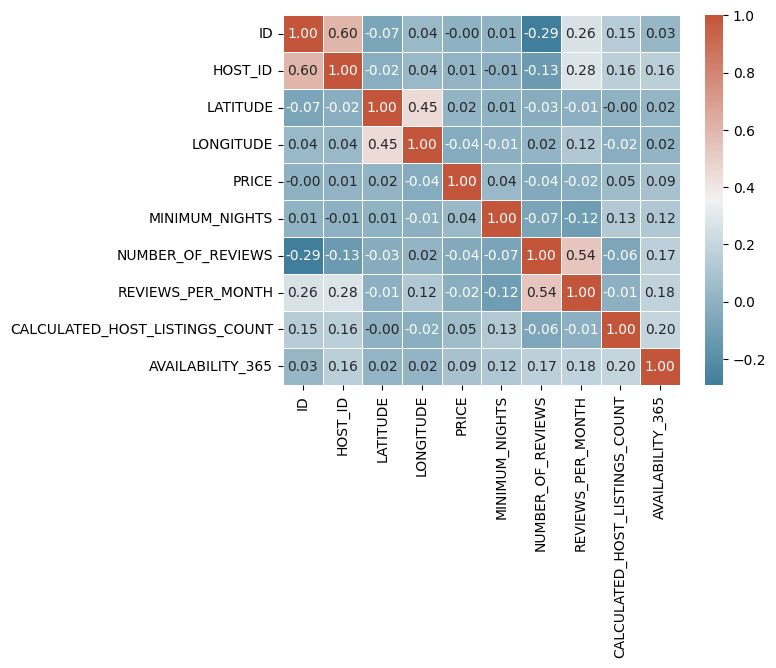

In [11]:
corr = df.corr()
# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap = sns.diverging_palette(230, 20, as_cmap=True),
        annot = True,
        fmt=".2f",
        linewidth=.5)

In [12]:
corr[corr > 0.3]

,ID,HOST_ID,LATITUDE,LONGITUDE,PRICE,MINIMUM_NIGHTS,NUMBER_OF_REVIEWS,REVIEWS_PER_MONTH,CALCULATED_HOST_LISTINGS_COUNT,AVAILABILITY_365
ID,1.000000,0.603185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HOST_ID,0.603185,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LATITUDE,NaN,NaN,1.000000,0.453951,NaN,NaN,NaN,NaN,NaN,NaN
LONGITUDE,NaN,NaN,0.453951,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
PRICE,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
MINIMUM_NIGHTS,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
NUMBER_OF_REVIEWS,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.539012,NaN,NaN
REVIEWS_PER_MONTH,NaN,NaN,NaN,NaN,NaN,NaN,0.539012,1.000000,NaN,NaN
CALCULATED_HOST_LISTINGS_COUNT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
AVAILABILITY_365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [13]:
df[df['ID'].duplicated()].sort_values(by='ID',ascending=True)
# df[df['ID']==2595]

,ID,HOST_ID,NEIGHBOURHOOD,LATITUDE,LONGITUDE,ROOM_TYPE,PRICE,MINIMUM_NIGHTS,NUMBER_OF_REVIEWS,LAST_REVIEW,REVIEWS_PER_MONTH,CALCULATED_HOST_LISTINGS_COUNT,AVAILABILITY_365
